# [Titanic: Machine Learning from Disaster][1].


  [1]: https://www.kaggle.com/c/titanic

### Contents

- [Import Libraries and loading data](#Import-Libraries-and-loading-data)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
  - [Missing value](#Missing-value)
  - [Sex](#Sex) 
  - [Pclass](#Pclass)
  - [SibSp](#SibSp)
  - [Parch](#Parch)
  - [Family Size](#Family-Size)
  - [Age](#Age)
  - [Fare](#Fare)
  - [Embarked](#Embarked)
- [Data Preprocessing](#Data-Preprocessing)
- [Model training](#Model-training)

# Import Libraries and loading data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set( font_scale=1, rc={'figure.figsize':(11.7,8.27)})

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
def missing_data(df):
    """遺失值總和、百分比"""
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum().div(df.isnull().count()).sort_values(ascending=False))
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

def plot_correlation_map(df):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submit = pd.read_csv('gender_submission.csv')

# EDA

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print('train_shape:', train.shape, 'test_shape:', test.shape)

train_shape: (891, 12) test_shape: (418, 11)


In [6]:
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Hogeboom, Mrs. John C (Anna Andrews)",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Feature description
#### DV
* Survived: 生存與否(0 = No, 1 = Yes) - int64

#### IV
* Pclass: 艙等 (1 = 1st, 2 = 2nd, 3 = 3rd) - int64
* Name: 乘客名字 - object
* Sex: 性別 - object
* Age: 年紀 - float64
* SibSp:兄弟姊妹/配偶數量  - int  
* Parch:父母/小孩數量  - int
* Ticket: 票號 - string
* Fare: 票價 - float
* Cabin: 船艙編號  - string
* Embarked:  登船船口 - string


* **Numerical Variables:** Age , Fare , SibSp , Parch 
* **Categorical Variable:** Survived, Sex, Embarked, Pclass, Ticket, Cabin

### Missing value

In [8]:
print(missing_data(train).head())
print(missing_data(test).head())

          Total   Percent
Cabin       687  0.771044
Age         177  0.198653
Embarked      2  0.002245
Fare          0  0.000000
Ticket        0  0.000000
          Total   Percent
Cabin       327  0.782297
Age          86  0.205742
Fare          1  0.002392
Embarked      0  0.000000
Ticket        0  0.000000


#### ===============================================================================================

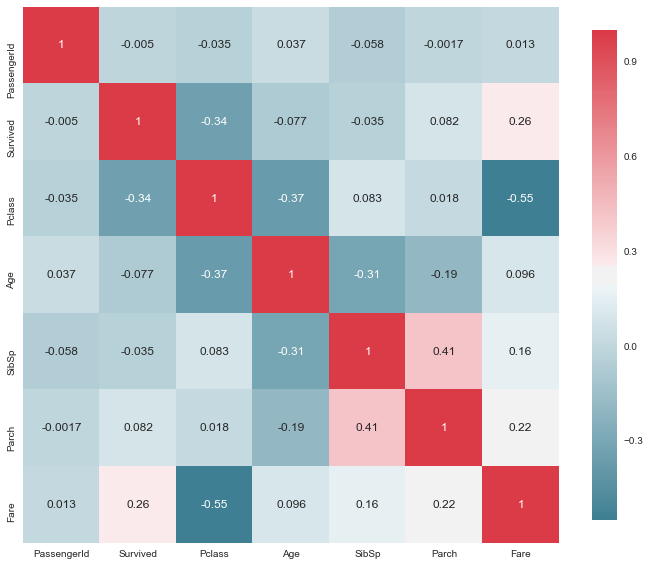

In [9]:
plot_correlation_map(train)

### Sex

In [10]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

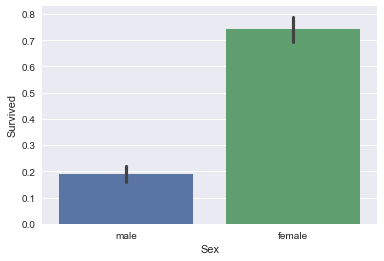

In [11]:
#draw a bar plot of survival by sex
sns.barplot(x='Sex', y='Survived', data=train)
plt.show()

In [12]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


### Pclass

In [13]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

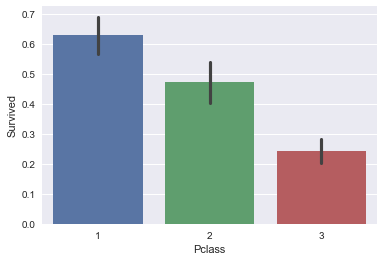

In [14]:
#draw a bar plot of survival by Pclass
sns.barplot(x="Pclass", y="Survived", data=train)
plt.show()

In [15]:
print (train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


1st存活率:62.96%; 2nd存活率:47.28%; 3st存活率:24.23%

### SibSp

In [16]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

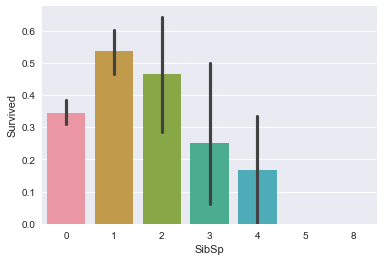

In [17]:
#draw a bar plot for SibSp vs. survival
sns.barplot(x="SibSp", y="Survived", data=train)
plt.show()

In [18]:
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


### Parch

In [19]:
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

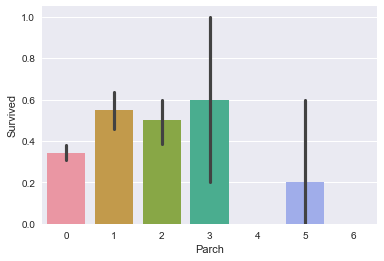

In [20]:
sns.barplot(x="Parch", y="Survived", data=train)
plt.show()

In [21]:
train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


### Family Size

In [22]:
train4V = train.copy()

In [23]:
train4V['FamilySize'] = train4V['SibSp']+ train4V['Parch']

In [24]:
train4V['FamilySize'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: FamilySize, dtype: int64

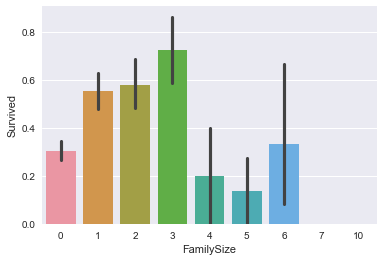

In [25]:
sns.barplot(x="FamilySize", y="Survived", data=train4V)
plt.show()

In [26]:
train4V[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean()

,FamilySize,Survived
0,0,0.303538
1,1,0.552795
2,2,0.578431
3,3,0.724138
4,4,0.200000
5,5,0.136364
6,6,0.333333
7,7,0.000000
8,10,0.000000


### Age

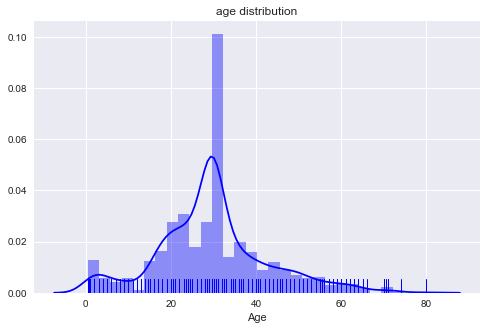

In [30]:
fig, ax = plt.subplots(1,figsize=(8,5))
sns.distplot(train.Age.fillna(np.mean(train.Age)), rug=True, color='b')
ax.set_title('age distribution')

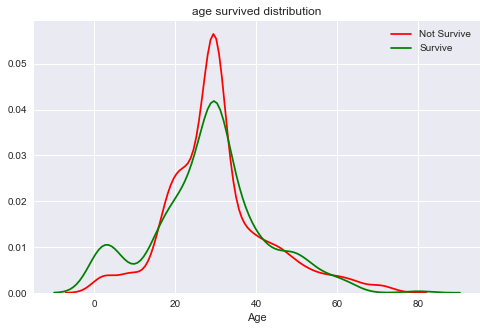

In [31]:
fig, axes = plt.subplots(1,figsize=(8,5))
axes.set_title('age survived distribution')
k1 = sns.distplot(train[train.Survived==0].Age.fillna(np.mean(train.Age)), hist=False, color='r', label='Not Survive')
k2 = sns.distplot(train[train.Survived==1].Age.fillna(np.mean(train.Age)), hist=False, color='g', label='Survive')

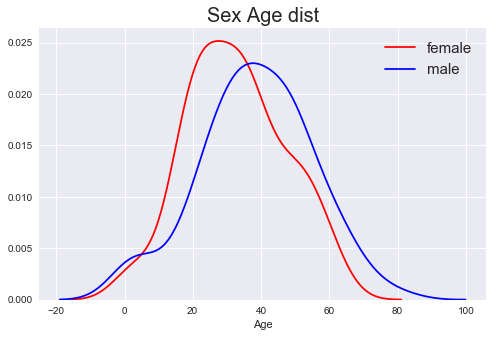

In [32]:
f, ax = plt.subplots(figsize=(8,5))
ax.set_title('Sex Age dist', size=20)
sns.distplot(train[train.Sex=='female'].dropna().Age, hist=False, color='R', label='female')
sns.distplot(train[train.Sex=='male'].dropna().Age, hist=False, color='B', label='male')
ax.legend(fontsize=15)

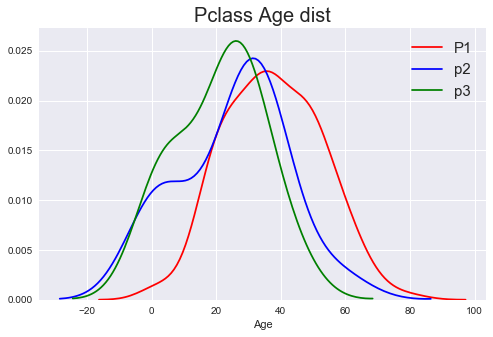

In [33]:
f, ax = plt.subplots(figsize=(8,5))
ax.set_title('Pclass Age dist', size=20)
sns.distplot(train[train.Pclass==1].dropna().Age, hist=False, color='r', label='P1')
sns.distplot(train[train.Pclass==2].dropna().Age, hist=False, color='b', label='p2')
sns.distplot(train[train.Pclass==3].dropna().Age, hist=False, color='g', label='p3')
ax.legend(fontsize=15)

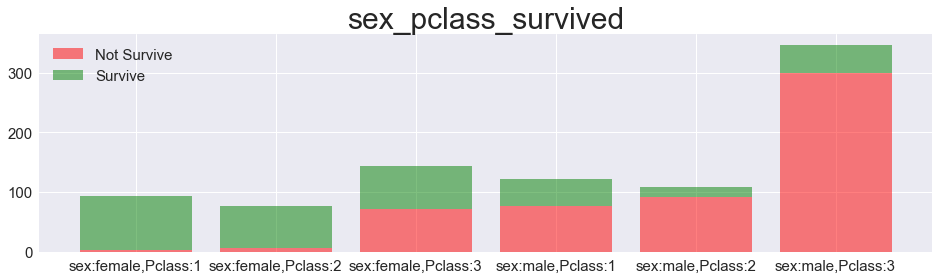

In [34]:
label = []
for sex_i in ['female','male']:
    for pclass_i in range(1,4):
        label.append('sex:%s,Pclass:%d'%(sex_i, pclass_i))
        
pos = range(6)
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(111)
ax.bar(pos, 
        train[train['Survived']==0].groupby(['Sex','Pclass'])['Survived'].count().values, 
        color='r', 
        alpha=0.5, 
        align='center',
        tick_label=label, 
        label='Not Survive')
ax.bar(pos, 
        train[train['Survived']==1].groupby(['Sex','Pclass'])['Survived'].count().values, 
        bottom=train[train['Survived']==0].groupby(['Sex','Pclass'])['Survived'].count().values,
        color='g',
        alpha=0.5,
        align='center',
        tick_label=label, 
        label='Survive')
ax.tick_params(labelsize=15)
ax.set_title('sex_pclass_survived', size=30)
ax.legend(fontsize=15,loc='best')

### Fare

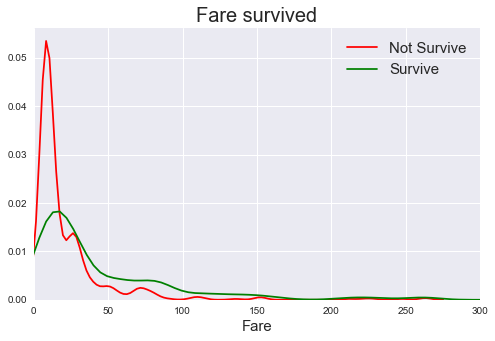

In [35]:
fig = plt.figure(figsize=(8,5))
ax1 = fig.add_subplot(111)
sns.kdeplot(train[train.Survived==0].Fare, ax=ax1, label='Not Survive', color='r')
sns.kdeplot(train[train.Survived==1].Fare, ax=ax1, label='Survive', color='g')
#sns.distplot(train[train.Survived==0].Fare, ax=ax1, color='r')
#sns.distplot(train[train.Survived==1].Fare, ax=ax1, color='g')
ax1.set_xlim([0,300])
ax1.legend(fontsize=15)
ax1.set_title('Fare survived', size=20)
ax1.set_xlabel('Fare', size=15)

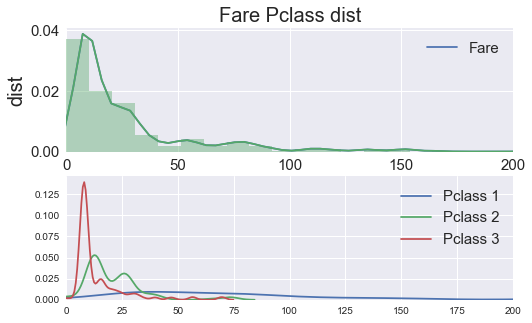

In [36]:
fig = plt.figure(figsize=(8, 5))
ax = plt.subplot2grid((2,2), (0,0), colspan=2)

ax.tick_params(labelsize=15)
ax.set_title('Fare dist', size=20)
ax.set_ylabel('dist', size=20)
sns.kdeplot(train.Fare, ax=ax)
sns.distplot(train.Fare, ax=ax)
ax.legend(fontsize=15)
pos = range(0,400,50)
ax.set_xticks(pos)
ax.set_xlim([0, 200])


ax1 = plt.subplot2grid((2,2), (1,0), colspan=2)
ax.set_title('Fare Pclass dist', size=20)
for i in range(1,4):
    sns.kdeplot(train[train.Pclass==i].Fare, ax=ax1, label='Pclass %d'%(i))
ax1.set_xlim([0,200])
ax1.legend(fontsize=15)

### Embarked 

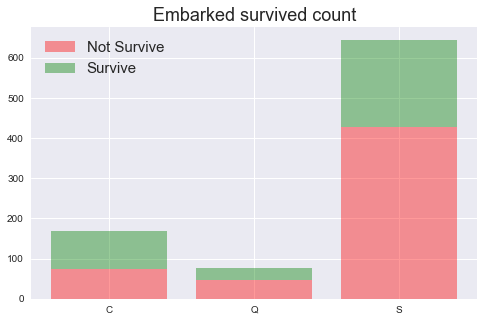

In [37]:
ax = plt.figure(figsize=(8,5)).add_subplot(111)
pos = [1, 2, 3]
y1 = train[train.Survived==0].groupby('Embarked')['Survived'].count().sort_index().values
y2 = train[train.Survived==1].groupby('Embarked')['Survived'].count().sort_index().values
ax.bar(pos, y1, color='r', alpha=0.4, align='center', label='Not Survive')
ax.bar(pos, y2, color='g', alpha=0.4, align='center', label='Survive', bottom=y1)
ax.set_xticks(pos)
ax.set_xticklabels(['C','Q','S'])
ax.legend(fontsize=15, loc='best')
ax.set_title('Embarked survived count', size=18)

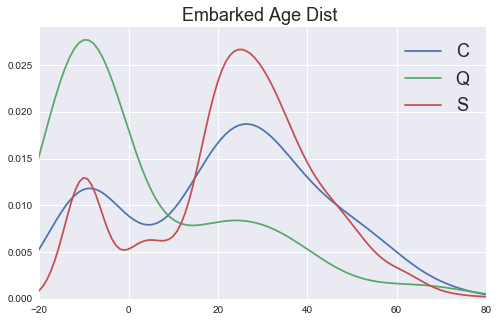

In [38]:
ax = plt.figure(figsize=(8,5)).add_subplot(111)
ax.set_xlim([-20, 80])
sns.kdeplot(train[train.Embarked=='C'].Age.fillna(-10), ax=ax, label='C')
sns.kdeplot(train[train.Embarked=='Q'].Age.fillna(-10), ax=ax, label='Q')
sns.kdeplot(train[train.Embarked=='S'].Age.fillna(-10), ax=ax, label='S')
ax.legend(fontsize=18)
ax.set_title('Embarked Age Dist ', size=18)

# Data Preprocessing

In [39]:
# combine train data and test data
total_df = pd.concat([train, test], axis = 0)

In [40]:
print('==========train==========')
print(missing_data(train).head())
print('==========test==========')
print(missing_data(test).head())
print('==========total==========')
print(missing_data(total_df).head())

==========train==========
          Total   Percent
Cabin       687  0.771044
Age         177  0.198653
Embarked      2  0.002245
Fare          0  0.000000
Ticket        0  0.000000
==========test==========
          Total   Percent
Cabin       327  0.782297
Age          86  0.205742
Fare          1  0.002392
Embarked      0  0.000000
Ticket        0  0.000000
==========total==========
          Total   Percent
Cabin      1014  0.774637
Survived    418  0.319328
Age         263  0.200917
Embarked      2  0.001528
Fare          1  0.000764


#### Deal with Embarked

In [41]:
total_df['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [42]:
total_df['Embarked'].fillna('S',inplace=True)

#### Deal with Fare

In [43]:
total_df['Fare'].fillna(total_df['Fare'].mean(), inplace=True)

#### Deal with Cabin

In [44]:
total_df["Cabin"] = total_df['Cabin'].apply(lambda x : str(x)[0] if not pd.isnull(x) else 'NoCabin')#曲第一個字元

In [45]:
total_df["Cabin"].unique()

array(['NoCabin', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

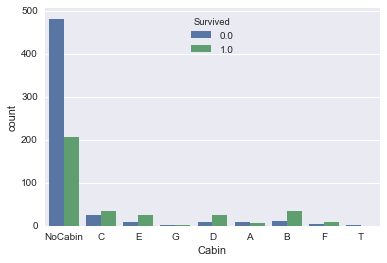

In [46]:
sns.countplot(total_df['Cabin'], hue=total_df['Survived'])

#### Deal with age

In [47]:
from sklearn import preprocessing 
from sklearn.model_selection import GridSearchCV  
from sklearn.ensemble import RandomForestRegressor#處理age遺失值

C:\Users\hahohy889\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [48]:
#轉one-hot-encoding
total_df['Sex'] = total_df['Sex'].astype('category').cat.codes
total_df['Embarked'] = total_df['Embarked'].astype('category').cat.codes
total_df['Pclass'] = total_df['Pclass'].astype('category').cat.codes
total_df['Cabin'] = total_df['Cabin'].astype('category').cat.codes

In [49]:
from sklearn import preprocessing 
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [50]:
dataAgeNull = total_df[total_df["Age"].isnull()]

In [51]:
dataAgeNotNull = total_df[total_df["Age"].notnull()]
dataAgeNotNull.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,7,2,7.2500,"Braund, Mr. Owen Harris",0,1,2,1,1,0.0,A/5 21171
1,38.0,2,0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,0,0,1,1.0,PC 17599
2,26.0,7,2,7.9250,"Heikkinen, Miss. Laina",0,3,2,0,0,1.0,STON/O2. 3101282
3,35.0,2,2,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,0,0,1,1.0,113803
4,35.0,7,2,8.0500,"Allen, Mr. William Henry",0,5,2,1,0,0.0,373450


In [52]:
taAgeNull = total_df[total_df["Age"].isnull()]
dataAgeNotNull = total_df[total_df["Age"].notnull()]

FR_age = RandomForestRegressor(n_estimators=2000, random_state = 889)
ageX = ['Cabin', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp']
FR_age.fit(dataAgeNotNull[ageX], dataAgeNotNull['Age'])

age_predict = FR_age.predict(dataAgeNull[ageX])
dataAgeNull.loc[:,"Age"] = age_predict
data = dataAgeNull.append(dataAgeNotNull)
data.reset_index(inplace=True, drop=True)

In [53]:
dataTrain = data[pd.notnull(data['Survived'])].sort_values(by=["PassengerId"])
dataTest = data[~pd.notnull(data['Survived'])].sort_values(by=["PassengerId"])

In [54]:
dataTrain.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
263,22.0,7,2,7.2500,"Braund, Mr. Owen Harris",0,1,2,1,1,0.0,A/5 21171
264,38.0,2,0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,0,0,1,1.0,PC 17599
265,26.0,7,2,7.9250,"Heikkinen, Miss. Laina",0,3,2,0,0,1.0,STON/O2. 3101282
266,35.0,2,2,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,0,0,1,1.0,113803
267,35.0,7,2,8.0500,"Allen, Mr. William Henry",0,5,2,1,0,0.0,373450


In [55]:
dataTest.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
977,34.5,7,1,7.8292,"Kelly, Mr. James",0,892,2,1,0,NaN,330911
978,47.0,7,2,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,2,0,1,NaN,363272
979,62.0,7,1,9.6875,"Myles, Mr. Thomas Francis",0,894,1,1,0,NaN,240276
980,27.0,7,2,8.6625,"Wirz, Mr. Albert",0,895,2,1,0,NaN,315154
981,22.0,7,2,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,2,0,1,NaN,3101298


In [56]:
df_Train = dataTrain[['Age', 'Cabin', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp', 'Survived']]
df_test = dataTest[['Age', 'Cabin', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp']]

# Model training

In [57]:
X = df_Train.iloc[:,:-1].values
y = df_Train.iloc[:,8].values
vaild = df_test.values

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

In [59]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=889)

In [60]:
rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=2000,
                             min_samples_split=12,
                             min_samples_leaf=1,
                             oob_score=True,
                             random_state=889,
                             n_jobs=-1) 

rf.fit(train_X, train_y)
print("%.4f" % rf.oob_score_)

0.8026


In [61]:
pd.concat((pd.DataFrame(df_Train.iloc[:, 1:].columns, columns = ['variable']), 
           pd.DataFrame(rf.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

,variable,importance
6,SibSp,0.308092
3,Parch,0.193362
0,Cabin,0.192021
5,Sex,0.098954
1,Embarked,0.089456
7,Survived,0.048903
4,Pclass,0.035913
2,Fare,0.033299


In [62]:
import xgboost as xgb
from xgboost import XGBClassifier
xgbr = xgb.XGBClassifier(n_estimators = 3000,  
                            min_child_weight = 3, 
                            gamma = 0, 
                            colsample_bytree = 0.7, 
                            reg_alpha = 1, 
                            reg_lambda = 0.01, 
                            learning_rate = 0.01,
                            random_state = 889)
xgbr.fit(train_X, train_y)
print("%.4f" % xgbr.score(train_X, train_y))

0.8844


In [63]:
xgbr_res =  xgbr.predict(vaild)

In [64]:
real_value = submit['Survived']

In [66]:
accuracy_score(xgbr_res, real_value)

0.8636363636363636

In [67]:
submit['Survived'] = xgbr_res
submit['Survived'] = submit['Survived'].astype(int)
submit.to_csv('submit.csv', index= False)

In [68]:
submit

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0
